### Import Libraries

In [1]:
import pandas as pd
import warnings
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

### Lod the Data

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [3]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [4]:
# Check the data shape of X and y to ensure they are loaded correctly and there is no mismatch.
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (48842, 14)
Shape of y: (48842, 1)


In [5]:
# Create a joined df and show the the first 5 rows. This is done to make easier data exploration and data cleaning.
df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Rename the column names to make them easier to access
df.columns = [col.replace('-', '_') for col in df.columns]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [7]:
# Make sure the data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
print('Missing value percentage per column:')
print("=" * 30)
print((df.isna().sum() / len(df) ))

Missing value percentage per column:
age               0.000000
workclass         0.019717
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.019778
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.005610
income            0.000000
dtype: float64


In [9]:
# Drop the na rows since we are not going to lose more than just 2% of the data
df.dropna(inplace=True)
# Check the missing values again to ensure they are dropped
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Drop the 'fnlwgt' column as it is not useful for our analysis and might introduce bias.
df.drop(columns=['fnlwgt'], inplace=True)
# Check the data shape after dropping the 'fnlwgt' column
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# We are going to use the education_num column to map the education levels to a numerical value.
education_mapping= df[['education', 'education_num']].drop_duplicates().sort_values('education_num')

In [12]:
# We can use the uci_metadata to get the types of the columns which will help us work easier when preprocessing the data.
uci_metadata = adult.variables.copy()
uci_metadata['name'] = uci_metadata['name'].str.replace('-', '_')
columns_by_type = uci_metadata.groupby('type')['name'].apply(list).to_dict()

# Define column types for easier access throughout the analysis
# Target column
target_col = 'income'

# Numerical columns (Integer type from UCI metadata)
numerical_columns = [col for col in df.columns if col in columns_by_type['Integer'] and col != target_col]

# Categorical columns (Categorical and Binary types from UCI metadata, excluding target)
categorical_columns = [col for col in df.columns if col in columns_by_type['Categorical']\
                        or (col in columns_by_type.get('Binary', []) and col != target_col)
                             ]

# All feature columns (excluding target)
feature_columns = numerical_columns + categorical_columns

print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Target column: {target_col}")


Numerical columns (5): ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical columns (8): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
Target column: income


In [13]:
# Check the categorical columns and their unique values
for i in df.columns:
    if i in categorical_columns:
        print(df[i].value_counts())

workclass
Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: count, dtype: int64
education
HS-grad         15444
Some-college    10512
Bachelors        7881
Masters          2610
Assoc-voc        2034
11th             1746
Assoc-acdm       1566
10th             1336
7th-8th           912
Prof-school       819
9th               735
12th              633
Doctorate         582
5th-6th           494
1st-4th           239
Preschool          78
Name: count, dtype: int64
marital_status
Married-civ-spouse       21966
Never-married            15555
Divorced                  6526
Separated                 1497
Widowed                   1443
Married-spouse-absent      600
Married-AF-spouse           34
Name: count, dtype: int64
occupation
Prof-specialty       6110
Craft-repair         6089
Exec-managerial      

### Data Quality Assessment

#### Missing Values & Formatting Issues 

**Issues Identified:**

1. **Hidden Missing Values:** '?' strings in categorical columns
2. **Target Variable Formatting:** Inconsistent trailing dots in income categories
3. **High Cardinality Features:** Need systematic grouping strategy

**Affected Columns:**

| Column | Issue |
|--------|-------|
| `workclass` | '?' values representing unknown 
| `occupation` | '?' values representing unknown 
| `native_country` | '?' values representing unknown 
| `income` | Trailing dots (`<=50K.` and `>50K.`)
| `occupation` | Check Cardinality if needs grouping 
| `native_country` | High cardinality + severe imbalance 


#### **Action Plan:**
1. **Quantify missing data** - Calculate '?' percentages per column
2. **Clean target variable** - Remove trailing dots from income categories  
3. **Statistical feature analysis** - Run Chi-square tests to determine grouping strategies
4. **Apply feature engineering** - Group high-cardinality features based on statistical validity
5. **Validate clean data** - Ensure no missing values and proper formatting before modeling

#### **Success Criteria:**
- Zero missing values across all columns
- Clean binary target variable format
- Statistically optimized categorical features
- <5% total data loss from cleaning

---

In [14]:
# Replace '?' with NaN in categorical columns
df[['workclass','occupation','native_country']] = df[['workclass','occupation','native_country']].replace('?', pd.NA,regex=False)
df.isna().sum() / df.shape[0]

age               0.000000
workclass         0.038554
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.038701
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.012242
income            0.000000
dtype: float64

In [15]:
# we can again drop the na rows since we are not going to lose more than just totally ~5% of the data and we avoid imputation bias.
df.dropna(inplace=True)
# Check the missing values again to ensure they are dropped
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [16]:
# Clean income target variable (remove trailing dot)
df['income'] = df['income'].str.replace('.', '', regex=False)
# Check the unique values in the income column to ensure they are clean
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
# Check duplicates and their percentage
df.duplicated().sum()/df.shape[0] 

np.float64(0.1322807483083455)

In [18]:
# Check exact duplicates (all columns)
exact_dups = df.duplicated().sum()

if exact_dups > 0:
    print("\nSample duplicate rows:")
    dup_rows = df[df.duplicated(keep=False)]
    print(dup_rows.head())

# Decision logic for this dataset
if exact_dups > 0:
    print(f"\nRemoving {exact_dups} exact duplicates...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")
else:
    print("No exact duplicates found")


Sample duplicate rows:
    age workclass  education  education_num      marital_status  \
2    38   Private    HS-grad              9            Divorced   
12   23   Private  Bachelors             13       Never-married   
17   32   Private    HS-grad              9       Never-married   
20   40   Private  Doctorate             16  Married-civ-spouse   
26   19   Private    HS-grad              9       Never-married   

           occupation   relationship   race     sex  capital_gain  \
2   Handlers-cleaners  Not-in-family  White    Male             0   
12       Adm-clerical      Own-child  White  Female             0   
17  Machine-op-inspct      Unmarried  White    Male             0   
20     Prof-specialty        Husband  White    Male             0   
26       Craft-repair      Own-child  White    Male             0   

    capital_loss  hours_per_week native_country income  
2              0              40  United-States  <=50K  
12             0              30  United-Sta

#### Determine Feature Enginering strategy for each categorical column

In [19]:
# Automated Statistical Test for All Categorical Features. 
# This function will run a statistical test on all categorical features to determine the feature strategy.
from scipy.stats import chi2_contingency
import numpy as np

def statistical_feature_test(df, target_col='income'):
    """
    Run statistical tests on all categorical columns to determine feature strategy
    """
    print("AUTOMATED FEATURE STRATEGY ANALYSIS")
    print("=" * 50)
    
    recommendations = {}
    
    for col in categorical_columns:
        print(f"\nTesting: {col.upper()}")
        print("-" * 30)
        
        try:
            # Step 1: Chi-square test
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # Step 2: Effect size (Cramér's V)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            
            # Step 3: Sample size adequacy
            min_expected = expected.min()
            adequate_sample = min_expected >= 5
            
            # Results
            print(f"Chi²: {chi2:.1f} | p-value: {p_value:.2e} | Cramér's V: {cramers_v:.3f}")
            print(f"Min expected: {min_expected:.1f} | Categories: {df[col].nunique()}")
            
            # Decision logic
            if p_value < 0.05 and cramers_v >= 0.1 and adequate_sample:
                strategy = "KEEP"
                reason = "Strong association + adequate samples"
            elif p_value < 0.05 and cramers_v >= 0.1:
                strategy = "GROUP"
                reason = "Strong association but small samples"
            elif p_value < 0.05 and cramers_v < 0.1:
                strategy = "BINARY"
                reason = "Weak association"
            else:
                strategy = "DROP"
                reason = "No significant association"
            
            print(f"RECOMMENDATION: {strategy} ({reason})")
            recommendations[col] = strategy
            
        except Exception as e:
            print(f"Error testing {col}: {e}")
            recommendations[col] = "ERROR"
    
    # Summary
    print(f"\nSUMMARY OF RECOMMENDATIONS")
    print("=" * 40)
    for col, strategy in recommendations.items():
        print(f"  {col}: {strategy}")
    
    return recommendations

# Run the analysis
feature_strategies = statistical_feature_test(df)

AUTOMATED FEATURE STRATEGY ANALYSIS

Testing: WORKCLASS
------------------------------
Chi²: 1045.7 | p-value: 1.16e-222 | Cramér's V: 0.163
Min expected: 5.3 | Categories: 7
RECOMMENDATION: KEEP (Strong association + adequate samples)

Testing: EDUCATION
------------------------------
Chi²: 5088.2 | p-value: 0.00e+00 | Cramér's V: 0.360
Min expected: 17.8 | Categories: 16
RECOMMENDATION: KEEP (Strong association + adequate samples)

Testing: MARITAL_STATUS
------------------------------
Chi²: 7837.1 | p-value: 0.00e+00 | Cramér's V: 0.447
Min expected: 8.1 | Categories: 7
RECOMMENDATION: KEEP (Strong association + adequate samples)

Testing: OCCUPATION
------------------------------
Chi²: 4415.7 | p-value: 0.00e+00 | Cramér's V: 0.335
Min expected: 3.6 | Categories: 14
RECOMMENDATION: GROUP (Strong association but small samples)

Testing: RELATIONSHIP
------------------------------
Chi²: 8102.6 | p-value: 0.00e+00 | Cramér's V: 0.454
Min expected: 335.6 | Categories: 6
RECOMMENDATION:

### Check for multicollinearity among categorical features

High correlations (>0.7):
Empty DataFrame
Columns: [var1, var2, correlation]
Index: []


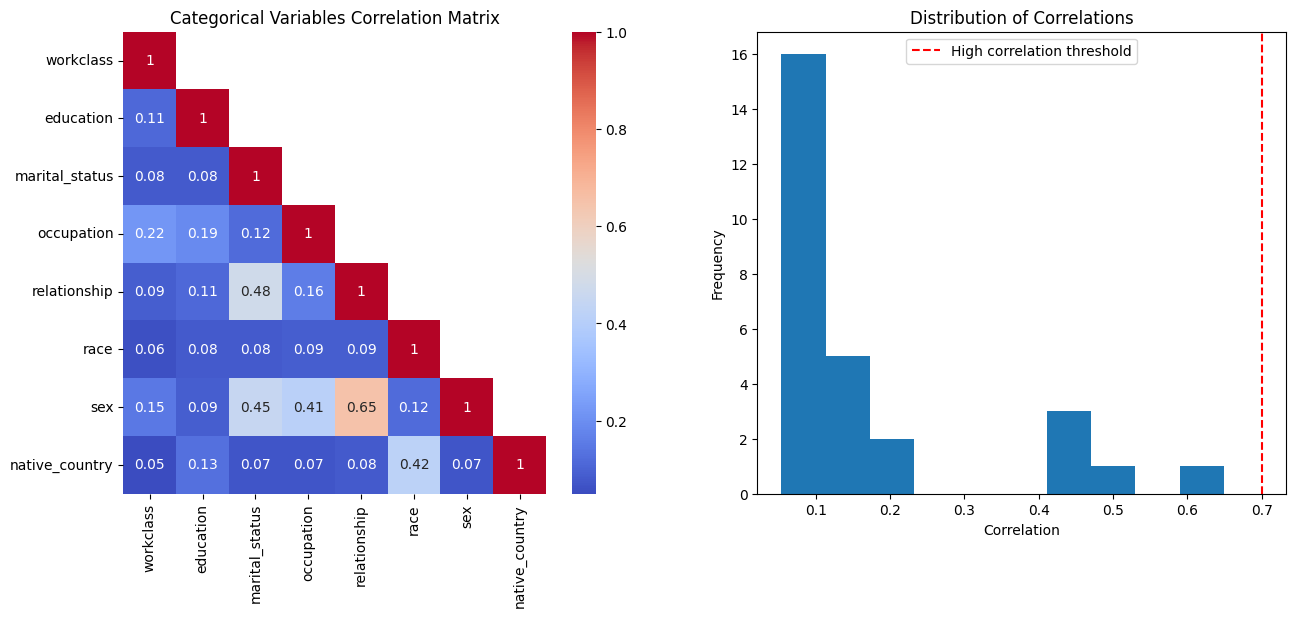

In [20]:
from scipy.stats import chi2_contingency
from itertools import combinations
import numpy as np
from scipy.stats import contingency

def simple_cramers_v(x, y):
    """Simple Cramers V calculation"""
    table = pd.crosstab(x, y)
    chi2 = contingency.chi2_contingency(table)[0]
    n = table.sum().sum()
    return np.sqrt(chi2 / (n * (min(table.shape) - 1)))

# Get correlations between categorical variables
cat_cols = [col for col in categorical_columns if col in df.columns]
correlations = []

for col1, col2 in combinations(cat_cols, 2):
    corr = simple_cramers_v(df[col1], df[col2])
    correlations.append([col1, col2, corr])

# Create correlation DataFrame
corr_df = pd.DataFrame(correlations, columns=['var1', 'var2', 'correlation'])

# Create full correlation matrix
corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Fill diagonal with 1s
np.fill_diagonal(corr_matrix.values, 1.0)

# Fill off-diagonal with correlations
for _, row in corr_df.iterrows():
    var1, var2, corr = row['var1'], row['var2'], row['correlation']
    corr_matrix.loc[var2, var1] = corr

# Show high correlations
high_corr = corr_df[corr_df['correlation'] > 0.7]
print("High correlations (>0.7):")
print(high_corr)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap
sns.heatmap(np.round(corr_matrix.astype(float),2), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Categorical Variables Correlation Matrix')

# Distribution
ax2.hist(corr_df['correlation'])
ax2.axvline(x=0.7, color='red', linestyle='--', label='High correlation threshold')
ax2.set_xlabel('Correlation')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Correlations')
ax2.legend()

plt.show()

In [21]:
def find_optimal_grouping(df, column, target_col='income', min_expected=5):
    """
    Find optimal number of top categories to keep based on statistical validity
    """    
    unique_cats = df[column].nunique()
    results = []
    
    # Test different numbers of top categories
    for top_n in range(3, min(unique_cats + 1, 21)):  # Test up to 20 categories
        # Create grouped version
        top_categories = df[column].value_counts().head(top_n).index.tolist()
        grouped = df[column].apply(lambda x: x if x in top_categories else 'Other')
        
        # Test statistical validity
        try:
            contingency = pd.crosstab(grouped, df[target_col])
            chi2, p_value, dof, expected = chi2_contingency(contingency)
            min_exp = expected.min()
            
            # Calculate coverage (% of data retained in top categories)
            coverage = (df[column].isin(top_categories)).mean()
            
            results.append({
                'top_n': top_n,
                'categories': top_n + 1,  # +1 for 'Other'
                'min_expected': min_exp,
                'valid': min_exp >= min_expected,
                'coverage': coverage,
                'p_value': p_value,  
                'cramers_v': np.sqrt(chi2 / (contingency.sum().sum() * (min(contingency.shape) - 1)))
            })
            
        except:
            continue
    
    results_df = pd.DataFrame(results)
    
    # Find optimal point: first valid solution with good coverage
    valid_solutions = results_df[results_df['valid'] == True]
    
    if len(valid_solutions) > 0:
        # Prefer solutions with >80% coverage if available
        high_coverage = valid_solutions[valid_solutions['coverage'] >= 0.8]
        if len(high_coverage) > 0:
            optimal = high_coverage.iloc[0]
        else:
            optimal = valid_solutions.iloc[0]
        
        return optimal['top_n'], results_df
    else:
        # If no valid solution, return the one with highest min_expected
        best = results_df.loc[results_df['min_expected'].idxmax()]
        return best['top_n'], results_df

def auto_group_categorical(df, column, target_col='income'):
    """
    Automatically determine optimal grouping for categorical variables
    """
    print(f"OPTIMIZING {column.upper()}")
    print("-" * 30)
    
    original_cats = df[column].nunique()
    optimal_n, analysis = find_optimal_grouping(df, column, target_col)
    
    # Apply optimal grouping
    top_categories = df[column].value_counts().head(optimal_n).index.tolist()
    new_col_name = f"{column}_grouped"
    df[new_col_name] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    
    # Get final stats
    final_cats = df[new_col_name].nunique()
    coverage = (df[column].isin(top_categories)).mean()
    
    print(f"Original categories: {original_cats}")
    print(f"Optimal top_n: {optimal_n}")
    print(f"Final categories: {final_cats}")
    print(f"Data coverage: {coverage:.1%}")
    print(f"Created: {new_col_name}")
    
    return new_col_name, analysis

# Apply to features that need grouping
print("OBJECTIVE CATEGORICAL GROUPING")
print("=" * 40)

grouped_features = {}
for col, strategy in feature_strategies.items():
    if strategy == 'GROUP':
        new_col, analysis = auto_group_categorical(df, col)
        grouped_features[col] = new_col
        print()

print(f"\nSUMMARY:")
for original, grouped in grouped_features.items():
    print(f"  {original} → {grouped}")

OBJECTIVE CATEGORICAL GROUPING
OPTIMIZING OCCUPATION
------------------------------
Original categories: 14
Optimal top_n: 7
Final categories: 8
Data coverage: 80.4%
Created: occupation_grouped

OPTIMIZING NATIVE_COUNTRY
------------------------------
Original categories: 41
Optimal top_n: 3
Final categories: 4
Data coverage: 93.0%
Created: native_country_grouped


SUMMARY:
  occupation → occupation_grouped
  native_country → native_country_grouped


In [22]:
# Drop the original columns after grouping
training_df = df.copy().drop(columns=['native_country','occupation','education'])
training_df.head()

,age,workclass,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,occupation_grouped,native_country_grouped
0,39,State-gov,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,Adm-clerical,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K,Exec-managerial,United-States
2,38,Private,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,Other,United-States
3,53,Private,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K,Other,United-States
4,28,Private,13,Married-civ-spouse,Wife,Black,Female,0,0,40,<=50K,Prof-specialty,Other


### Simple Check For Multicollinearity in numerical columns

In [23]:
### Lets first check for normality of the distribution of the numerical values to apply the appropriate correlation method
from scipy.stats import shapiro

def test_normality_all(df, columns):
    """
    Test normality for all numerical columns at once
    """
    results = []
    
    for col in columns:
        stat, p_value = shapiro(df[col])
        test_name = 'Shapiro'
        
        results.append({
            'variable': col,
            'test': test_name,
            'statistic': stat,
            'p_value': p_value,
            'is_normal': p_value > 0.05
        })

    return pd.DataFrame(results)

# Test all numerical variables
normality_results = test_normality_all(training_df, numerical_columns)
print("NORMALITY TEST RESULTS")
print("=" * 30)
print(normality_results)

# Quick summary
normal_vars = normality_results[normality_results['is_normal'] == True]['variable'].tolist()
non_normal_vars = normality_results[normality_results['is_normal'] == False]['variable'].tolist()

print(f"\nNormal variables: {normal_vars}")
print(f"Non-normal variables: {non_normal_vars}")

NORMALITY TEST RESULTS
         variable     test  statistic        p_value  is_normal
0             age  Shapiro   0.972805   1.219041e-62      False
1   education_num  Shapiro   0.932671   3.532591e-82      False
2    capital_gain  Shapiro   0.135466  8.868333e-152      False
3    capital_loss  Shapiro   0.241177  1.062082e-147      False
4  hours_per_week  Shapiro   0.896309   1.936878e-92      False

Normal variables: []
Non-normal variables: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Text(0.5, 1.0, 'Kendall Correlation Matrix for Numerical Features')

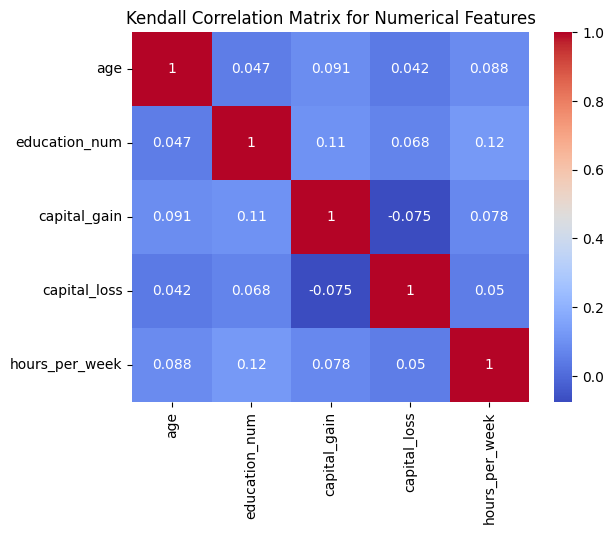

In [24]:
# Quick correlation check - remove highly correlated features
corr_matrix = training_df[numerical_columns].corr(method='kendall')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Kendall Correlation Matrix for Numerical Features')

In [25]:
# Ensure no missing values remain
training_df.isnull().sum()


age                       0
workclass                 0
education_num             0
marital_status            0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
income                    0
occupation_grouped        0
native_country_grouped    0
dtype: int64

In [26]:
# Check data types are numeric
training_df.dtypes

age                        int64
workclass                 object
education_num              int64
marital_status            object
relationship              object
race                      object
sex                       object
capital_gain               int64
capital_loss               int64
hours_per_week             int64
income                    object
occupation_grouped        object
native_country_grouped    object
dtype: object

In [29]:
import os
import json

# Define the correct path to the training_data folder
project_root = r'C:\Users\jarie\OneDrive\Escritorio\VsCode\Data-Scientist Test'
training_data_path = os.path.join(project_root, 'training_data')

# Create folder and save files
os.makedirs(training_data_path, exist_ok=True)

# Save data with full paths
training_df.to_csv(os.path.join(training_data_path, 'training_data.csv'), index=False)
education_mapping.to_csv(os.path.join(training_data_path, 'education_mapping.csv'), index=False)

# Update categorical_columns to include grouped columns
categorical_columns.extend(['occupation_grouped', 'native_country_grouped'])  # Add new grouped columns

# Update feature_columns as well
updated_feature_columns = numerical_columns + categorical_columns

# Save updated column info
column_info = {
    'numerical_columns': numerical_columns,
    'categorical_columns': categorical_columns,  # Updated list
    'target_col': target_col,
    'feature_columns': updated_feature_columns  # Updated list
}

with open(os.path.join(training_data_path, 'column_info.json'), 'w') as f:
    json.dump(column_info, f, indent=2)

print(f"Files saved to {training_data_path}")
print(f"Updated categorical columns: {categorical_columns}")

# Verify files were created
print("\nVerifying saved files:")
for filename in ['training_data.csv', 'education_mapping.csv', 'column_info.json']:
    filepath = os.path.join(training_data_path, filename)
    if os.path.exists(filepath):
        print(f"{filename} - Size: {os.path.getsize(filepath):,} bytes")
    else:
        print(f"{filename} - NOT FOUND")

Files saved to C:\Users\jarie\OneDrive\Escritorio\VsCode\Data-Scientist Test\training_data
Updated categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'occupation_grouped', 'native_country_grouped', 'occupation_grouped', 'native_country_grouped', 'occupation_grouped', 'native_country_grouped']

Verifying saved files:
training_data.csv - Size: 3,615,262 bytes
education_mapping.csv - Size: 215 bytes
column_info.json - Size: 963 bytes
